<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 05 Prediction 1 - Random Forest

### Riccardo Spolaor (864877)

</center>

In [30]:
import numpy as np
import pandas as pd

In [31]:
dataframe = pd.read_csv('./datasets/dataframe03.csv', low_memory = False)

In [32]:
dataframe.head(10)

,Winner,csvID,ATP,Series,Round,Best of,PlayedA,PlayedB,WinRatioA,WinRatioB,...,Simon G.B,Bautista Agut R.A,Bautista Agut R.B,Verdasco F.A,Verdasco F.B,OtherA,OtherB,OpponentsPlayed,OpponentsWRatioA,OpponentsWRatioB
0,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,0,1,0,0.0,0.0
1,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
2,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
3,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
4,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
5,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
6,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
7,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
8,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,1,1,0,0.0,0.0
9,0,0,1.0,0,0,3.0,0,0,0.0,0.0,...,0,0,0,0,0,0,1,0,0.0,0.0


In [33]:
dataframe.columns.values

array(['Winner', 'csvID', 'ATP', 'Series', 'Round', 'Best of', 'PlayedA',
       'PlayedB', 'WinRatioA', 'WinRatioB', 'setsTournA', 'setsTournB',
       'setsWRatioTournA', 'setsWRatioTournB', 'gamesTournA',
       'gamesTournB', 'gamesWRatioTournA', 'gamesWRatioTournB', 'RankA',
       'RankFilledA', 'RankB', 'RankFilledB', 'PtsA', 'PtsFilledA',
       'PtsB', 'PtsFilledB', 'MaxA', 'MaxFilledA', 'MaxB', 'MaxFilledB',
       'AvgA', 'AvgFilledA', 'AvgB', 'AvgFilledB', 'MinA', 'MinB',
       'PlayedCourtA', 'PlayedCourtB', 'WonRatioCourtA', 'WonRatioCourtB',
       'Indoor', 'Outdoor', 'Clay', 'Grass', 'Hard', 'TournamentEnc',
       'Djokovic N.A', 'Djokovic N.B', 'Nadal R.A', 'Nadal R.B',
       'Federer R.A', 'Federer R.B', 'Murray A.A', 'Murray A.B',
       'Ferrer D.A', 'Ferrer D.B', 'Berdych T.A', 'Berdych T.B',
       'Nishikori K.A', 'Nishikori K.B', 'Wawrinka S.A', 'Wawrinka S.B',
       'Del Potro J.M.A', 'Del Potro J.M.B', 'Tsonga J.W.A',
       'Tsonga J.W.B', 'Cilic M.A', '

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def getRandomForestPrediction (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    accuracies_valid = []
    
    for i in range(10,50,10):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies_valid += [valid_acc]
        print ("\t Estimators: {:2d} - Validation Accuracy: {:.3f}".format(
            i, valid_acc) )

getRandomForestPrediction()

	 Estimators: 10 - Validation Accuracy: 0.641
	 Estimators: 20 - Validation Accuracy: 0.653
	 Estimators: 30 - Validation Accuracy: 0.656
	 Estimators: 40 - Validation Accuracy: 0.659


In [35]:
def getPredImportance (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train,y_train)

    return rf.feature_importances_

featImp = getPredImportance()

C:\Users\ricca\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


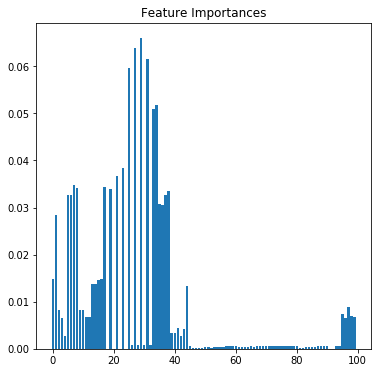

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
ax.bar(range(0,dataframe.loc[:, dataframe.columns != 'Winner'].shape[1]), featImp)
ax.set_title("Feature Importances")
fig.show()

In [41]:
from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])

KeyboardInterrupt: 

In [ ]:
accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))